In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 100 samples with 2 features
X1 = np.random.rand(100, 1) * 10  # Feature 1
X2 = np.random.rand(100, 1) * 5   # Feature 2
noise = np.random.randn(100, 1)   # Noise

# Target variable (y) with a linear relationship
y = 3 * X1 + 2 * X2 + 5 + noise * 2  

# Create a DataFrame
df = pd.DataFrame(np.hstack((X1, X2, y)), columns=["X1", "X2", "y"])
df.head()

,X1,X2,y
0,3.745401,0.157146,15.190446
1,9.507143,3.182052,40.350041
2,7.319939,1.571780,30.689523
3,5.986585,2.542853,26.616759
4,1.560186,4.537832,22.487773


In [4]:
# Split data into training and testing sets
X = df[["X1", "X2"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 4.586514977947029
Coefficients: [2.95000442 2.3148695 ]


In [6]:
# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 2.67
R² Score: 0.97


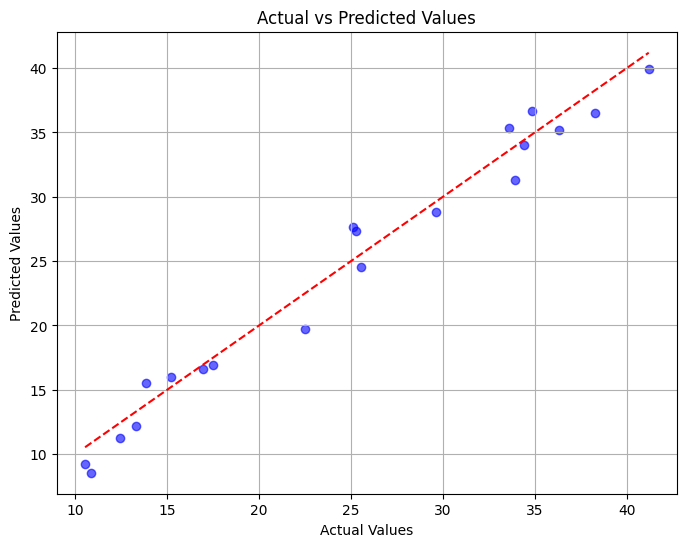

In [7]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid()
plt.show()


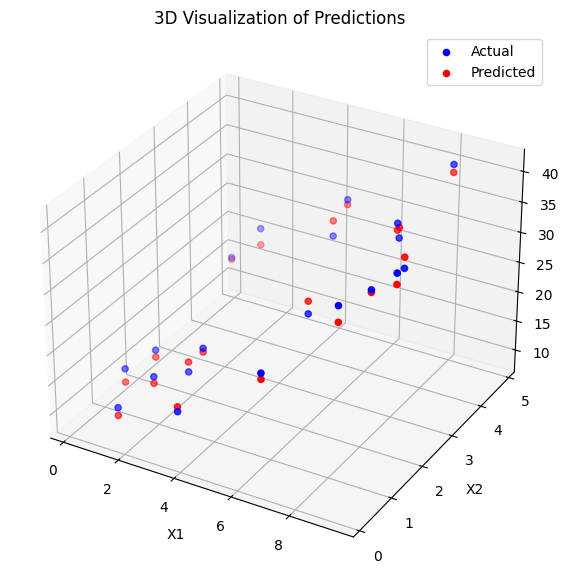

In [8]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of original data points
ax.scatter(X_test["X1"], X_test["X2"], y_test, color='blue', label="Actual")

# Scatter plot of predictions
ax.scatter(X_test["X1"], X_test["X2"], y_pred, color='red', label="Predicted")

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("3D Visualization of Predictions")
ax.legend()
plt.show()


In [10]:
from celluloid import Camera
import matplotlib.animation as animation


In [11]:
# Generate simple dummy data for animation
np.random.seed(42)
X_anim = np.random.rand(100, 1) * 10  # Feature
y_anim = 3 * X_anim + 5 + np.random.randn(100, 1) * 2  # Linear relation with noise

# Convert to DataFrame
df_anim = pd.DataFrame(np.hstack((X_anim, y_anim)), columns=["X", "y"])
df_anim.head()

,X,y
0,3.745401,16.410298
1,9.507143,32.923414
2,7.319939,27.143340
3,5.986585,18.984617
4,1.560186,9.241215


In [12]:
# Train the model
model_anim = LinearRegression()
model_anim.fit(df_anim[["X"]], df_anim["y"])

# Get predictions
y_pred_anim = model_anim.predict(df_anim[["X"]])

# Extract slope and intercept
m = model_anim.coef_[0]
b = model_anim.intercept_

print(f"Intercept: {b:.2f}, Slope: {m:.2f}")


Intercept: 5.43, Slope: 2.91


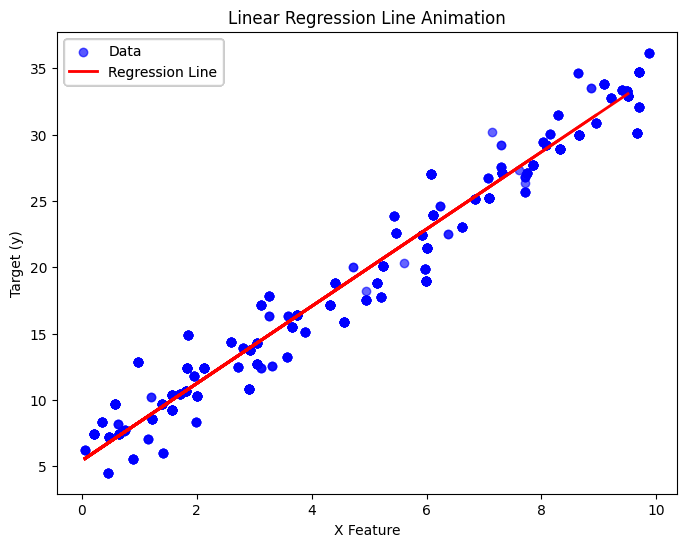

In [13]:
# Initialize figure and camera
fig, ax = plt.subplots(figsize=(8, 6))
camera = Camera(fig)

# Sort X for line plotting
X_sorted = np.sort(df_anim["X"].values)
y_sorted = m * X_sorted + b  # True regression line

# Animation - show incremental points and line
for i in range(1, len(X_sorted) + 1, 5):  # Increment by 5 points each frame
    ax.scatter(df_anim["X"][:i], df_anim["y"][:i], color='blue', alpha=0.6, label="Data" if i == 1 else "")
    ax.plot(X_sorted[:i], y_sorted[:i], 'r-', linewidth=2, label="Regression Line" if i == 1 else "")
    
    ax.set_xlabel("X Feature")
    ax.set_ylabel("Target (y)")
    ax.set_title("Linear Regression Line Animation")
    ax.legend()
    ax.grid()
    
    camera.snap()  # Capture frame

# Create animation
anim = camera.animate(interval=100)
plt.show()


In [14]:
# Save animation as GIF (optional)
anim.save("linear_regression_animation.gif", writer="pillow")


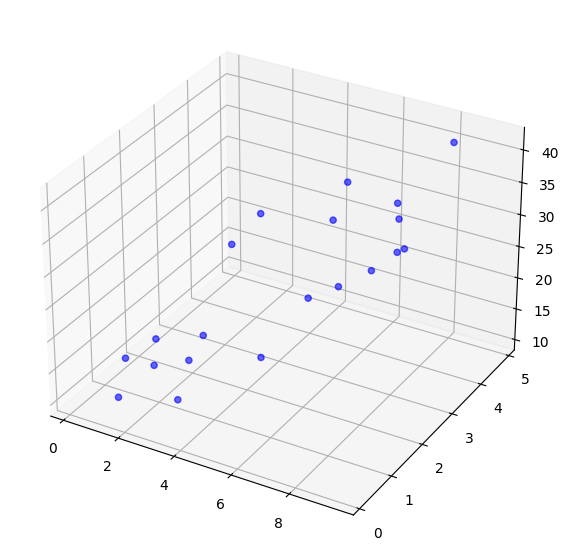

In [16]:
# Set up figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot Data
X1_vals = X_test["X1"].values
X2_vals = X_test["X2"].values
y_vals = y_test.values

# Create Mesh Grid for Regression Plane
X1_range = np.linspace(X1_vals.min(), X1_vals.max(), 10)
X2_range = np.linspace(X2_vals.min(), X2_vals.max(), 10)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

# Compute Predicted Surface
y_plane = model.intercept_ + model.coef_[0] * X1_mesh + model.coef_[1] * X2_mesh

# Initialize Scatter Plot
scatter = ax.scatter(X1_vals, X2_vals, y_vals, color='blue', alpha=0.6, label="Actual Data")

# Animation Function
def update(frame):
    ax.clear()
    
    # Scatter Plot
    ax.scatter(X1_vals, X2_vals, y_vals, color='blue', alpha=0.6, label="Actual Data")

    # Regression Plane Appears Over Time
    alpha_value = min(1, frame / 50)  # Gradually increase alpha for plane visibility
    ax.plot_surface(X1_mesh, X2_mesh, y_plane, color='red', alpha=alpha_value)

    # Labels and Rotation
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("y")
    ax.set_title("3D Regression Plane Animation")
    ax.view_init(elev=20, azim=frame * 2)  # Rotate slowly

    ax.legend()

# Create Animation
ani = animation.FuncAnimation(fig, update, frames=50, interval=100)

# Display Animation
plt.show()


In [17]:
ani.save("3d_regression_animation.gif", writer="pillow")


C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
